<a href="https://colab.research.google.com/github/LittleAri/ALICE/blob/main/ALICE_demo_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALICE SOFTWARE

Demo of ALICE software.

Here, we show how four (paths of) images can be used to find labels and produce one merged label.

For more of a visualisation of each of the main individual steps of the algorithm, check out the latter half of the notebook _filming_demo.py_.

#### Google Drive
Currently, the images are stored in a Google drive, so we load this to run our tests.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Library Versions

Only neccesary if using colab, since in general, the correct versions of each library should be installed.

In [ ]:
!pip install tensorflow==1.15.5
!pip install keras==2.3.1
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install numpy==1.21.5
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.9 kB/s 
     |████████████████████████████████| 50 kB 8.1 MB/s 
     |████████████████████████████████| 3.8 MB 53.5 MB/s 
     |████████████████████████████████| 20.1 MB 71.6 MB/s 
     |████████████████████████████████| 2.9 MB 56.2 MB/s 
     |████████████████████████████████| 503 kB 90.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=500d29b75d2a4707c8c101612cfbe9b71a951b10d6ad1bad0000e0972c2b9aab
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully unins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 5.0 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-_fcfpev2
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-_fcfpev2
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=b2f3a1625b5cb1e7d5553c3ede2503d3ffa94079d7376df54043b181b291f9c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-qy4b81gd/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.de

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


#### Imports
We import the files in the folder Mask_RCNN_Files for the CNN, and the files in source_functions for everything else. We will mainly be using the python file _demo.py_ in this notebook.

In [1]:
import utils
import model as modellib
import visualize
import coco
from demo import *
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term
Using TensorFlow backend.


#### Sample Data

In [2]:
all_sample = []

for file in os.listdir('drive/My Drive/ALICE/sample'):
  all_sample.append(file)


all_ids = []

for nm in all_sample:
  id_ = nm[:re.search("_",nm).span()[0]]
  all_ids.append(id_)

df_files = pd.DataFrame([all_sample,all_ids]).T

unq_IDs = np.unique(list(df_files['id']))

df_files = df_files.rename(columns={0:'filename',1:'id'})

In [16]:
def get_paths_for_specimen(specimen,pth='drive/My Drive/ALICE/sample'):
  files = list(df_files[df_files['id']==specimen]['filename'])
  paths = [pth+'/'+f for f in files]
  return paths

In [17]:
paths = get_paths_for_specimen(unq_IDs[19])

#### Masks Example

In [10]:
model = load_label_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use `tf.cast` instead.


In [11]:
details_dict = get_masks_(paths,with_pin=True,multiple_images=True,model=model)

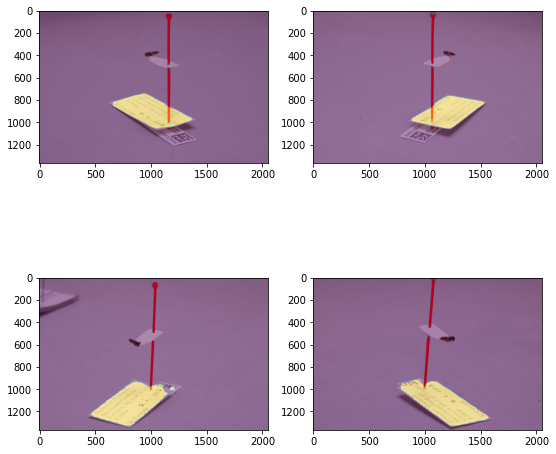

In [12]:
fig,ax = plt.subplots(2,2,figsize=(9,9))

j = 0

for i in range(0,4):
  if (i%2==0) and (i>0):
    j = j+1
  img = details_dict[i]['image']
  #ax[j,i%2].imshow(img)
  label = details_dict[i]['mask_l']
  pin = details_dict[i]['mask_p']
  ax[j,i%2].imshow(pin)
  ax[j,i%2].imshow(label,alpha=0.4)

#### Merged Label Example

In [15]:
all_images, transformed, merged, orig_transformed, aligned = ALICE_demo(paths,model=model)

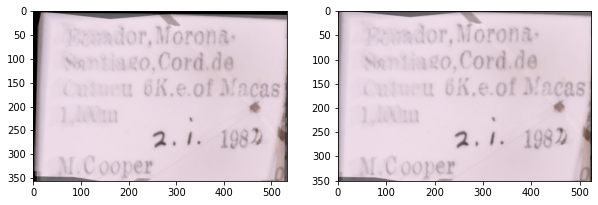

In [20]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(merged)
ax[1].imshow(aligned)